In [1]:
import pandas as pd
import numpy as np

### Compute the predicted variable: User Adoption

In [2]:
records = pd.read_csv('takehome_user_engagement.csv')
records.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
# convert the time stamp into an actual timestamp object
time_s = [pd.Timestamp(x) for x in records.time_stamp]
time_s[:5]

[Timestamp('2014-04-22 03:53:30'),
 Timestamp('2013-11-15 03:45:04'),
 Timestamp('2013-11-29 03:45:04'),
 Timestamp('2013-12-09 03:45:04'),
 Timestamp('2013-12-25 03:45:04')]

In [23]:
# convert the time into day to get the number of visits by day
records['date'] = [x.date() for x in time_s]
records.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [28]:
groups = records.groupby(["user_id", "date"]).size()
groups.head()

user_id  date      
1        2014-04-22    1
2        2013-11-15    1
         2013-11-29    1
         2013-12-09    1
         2013-12-25    1
dtype: int64

In [70]:
records.loc[records.user_id == 2, 'date']

1     2013-11-15
2     2013-11-29
3     2013-12-09
4     2013-12-25
5     2013-12-31
6     2014-01-08
7     2014-02-03
8     2014-02-08
9     2014-02-09
10    2014-02-13
11    2014-02-16
12    2014-03-09
13    2014-03-13
14    2014-03-31
Name: date, dtype: object

* Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period

In [74]:
# test out computing the difference in days between every other log in
sub_dates = records.loc[records.user_id == 2, 'date']
[(b-a).days < 7 for (a,b) in zip(sub_dates[:-2], sub_dates[2:])]


[False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False]

In [73]:
 # create a variable to store predicted variable
# 0 = not adopted
# 1 = adopted: 3 different days in a 7 day period

def get_adoption(user,records): #  user is the user_id
    sub_dates = records.loc[records.user_id == user, 'date']
    if len(sub_dates) < 3:
        return 0
    else:
        # compute difference in dates between first and third log-in were within 7 days
        seq_a = [(b-a).days <7 for (a,b) in zip(sub_dates[:-2], sub_dates[2:])] 
        # until the 3rd to last element
        return 1 * (sum(seq_a)>0 ) # 1 for true, 0 for not true



In [75]:
print('Test user 1: ',get_adoption(1,records))
print('Test user 2: ',get_adoption(2,records))

print('Test user 3: ', get_adoption(3,records))



Test user 1:  0
Test user 2:  1
Test user 3:  0


In [76]:
# compute for all users
unique_vals = records.user_id.unique()
user_adoption = pd.DataFrame({"user_id" : unique_vals,
                              "adopt" : [get_adoption(i, records) for i in unique_vals]
                             }
                            )

In [107]:
user_adoption.shape

(8823, 2)

In [78]:
# save as csv for records
user_adoption.to_csv('user_adoption.csv', header= True)

### Identify the most significant factors to user adoption

In [85]:
# first load in the user information

user_info = pd.read_csv('takehome_users.csv', encoding="ISO-8859-1")
user_info[:10]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [83]:
#compare the user id in two files
print(user_info.object_id.unique())
print(user_adoption.user_id.unique())

[    1     2     3 ..., 11998 11999 12000]
[    1     2     3 ..., 11998 11999 12000]


In [84]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [86]:
# join in the user adoption column
user_info = pd.merge(user_info, user_adoption ,how='left', 
                     left_on= 'object_id', right_on='user_id' )
user_info.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopt,user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,2.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,3.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,4.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,5.0


In [87]:
# convert creation_time to a timestamp and see if 
# there is greater adoption for those created account at a certain time

user_info['creation_time'] = pd.to_datetime(user_info['creation_time'],
                                            format='%Y-%m-%d %H:%M:%S')

In [95]:
import matplotlib.pyplot as plt
import matplotlib
user_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 12 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopt                         8823 non-null float64
user_id                       8823 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 1.2+ MB


* The number of missing values in 'adopt' is the same as 'last_session_creation_time'
* Those that never logged in would never have a value in those two fields
* Fill in those missing values as 0 for adopt
* Currently, those that had no invitation had an 'NA' value in 'invited_by_user_id'
* Create another variable that records whether there was an invitation or not using 'invited_by_user_id'

In [132]:
user_info.adopt = user_info.adopt.fillna(value = 0)
user_info['invited'] = (user_info.invited_by_user_id.fillna(value = 0) > 0) * 1
 # 1 for invited, 0 for not invited
user_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 14 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopt                         12000 non-null float64
user_id                       8823 non-null float64
create_date                   12000 non-null object
invited                       12000 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 1.4+ MB


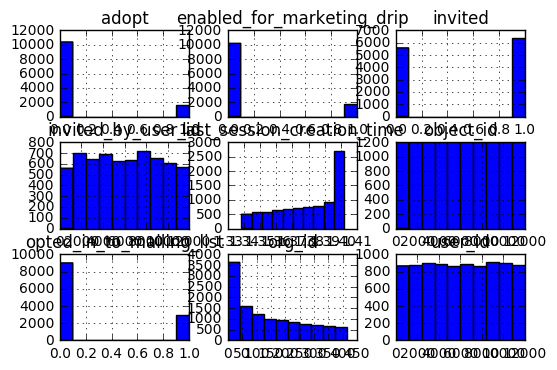

In [134]:
user_info.hist()
plt.show()

In [99]:
user_info['create_date' ] = user_info.creation_time.dt.date
by_date = user_info.groupby('create_date').adopt.sum()
# sum the total number of adopted by the creation date
by_date.head()

create_date
2012-05-31    1.0
2012-06-01    1.0
2012-06-02    2.0
2012-06-03    2.0
2012-06-04    0.0
Name: adopt, dtype: float64

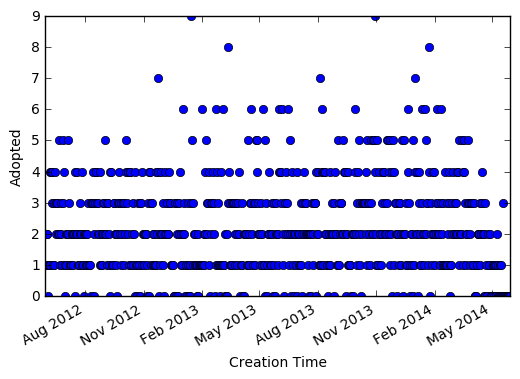

In [110]:
# see if there is any temporal patterns
fig, ax = plt.subplots(1)
ax.plot_date(by_date.index, by_date)
ax.set_xlabel('Creation Time')

fig.autofmt_xdate()

ax.set_ylabel('Adopted')
plt.show()

* There doesn't seem to be any temporal pattern in the adoption numbers

### Logistic Regression
* Run a logstic regression to assess the relationship between adoption and the following:
<p> 1. creation_source             
<p> 2. opted_in_to_mailing_list      
<p> 3. enabled_for_marketing_drip    
<p> 4. invited <p/>

* If the 'organiztion' category in creation_source feature is significant, then investigate deeper into the specific organizations

In [136]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

In [138]:
form_1 = 'adopt ~ creation_source + invited + \
                opted_in_to_mailing_list + enabled_for_marketing_drip '
mod_1 = glm(formula=form_1, data= user_info, family=sm.families.Binomial()).fit()
mod_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  adopt   No. Observations:                12000
Model:                            GLM   Df Residuals:                    11993
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4668.1
Date:                Thu, 20 Apr 2017   Deviance:                       9336.2
Time:                        17:00:43   Pearson chi2:                 1.20e+04
No. Iterations:                   100                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------
Intercept                              2.259e+12    1.6e+12      1.414      0.157     -8.71e+11  5.39e+12
creation_source[T.ORG_INVITE]            -0.3496      0.084     -4.172      0.000        -0.514    -0.185
creation_source[T.PERSONAL_PROJECTS]  -2.259e+12    1.6e+12     -1.414      0.157     -5.39e+12  8.71e+11
creation_source[T.SIGNUP]             -2.259e+12    1.6e+12     -1.414      0.157     -5.39e+12  8.71e+11
creation_source[T.SIGNUP_GOOGLE_AUTH] -2.259e+12    1.6e+12     -1.414      0.157     -5.39e+12  8.71e+11
invited                               -2.259e+12    1.6e+12     -1.414      0.157     -5.39e+12  8.71e+11
opted_in_to_mailing_list                  0.0509      0.069      0.738      0.460        -0.084     0.186
enabled_for_marketing_drip                0.0043      0.084      0.052      0.959        -0.160     0.168
=========================================================================================================
"""

* It seems that those invited by an organization is more likely to adopt than other motivations for signing up